# 타이타닉 데이터 EDA

## 목표
* 목표변수인 Survived에 어떤 지표들이 영향을 주는지 상관관계를 파악하고 분석한다.

## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home.dest : 출신

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/이어드림강의/2022-04-26(Project,변치웅)/titanic.csv") 
#복사본 df_base

In [ ]:
df_base=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/이어드림강의/2022-04-26(Project,변치웅)/titanic.csv") 

##데이터 샘플링 및 전처리

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


<Figure size 576x432 with 0 Axes>

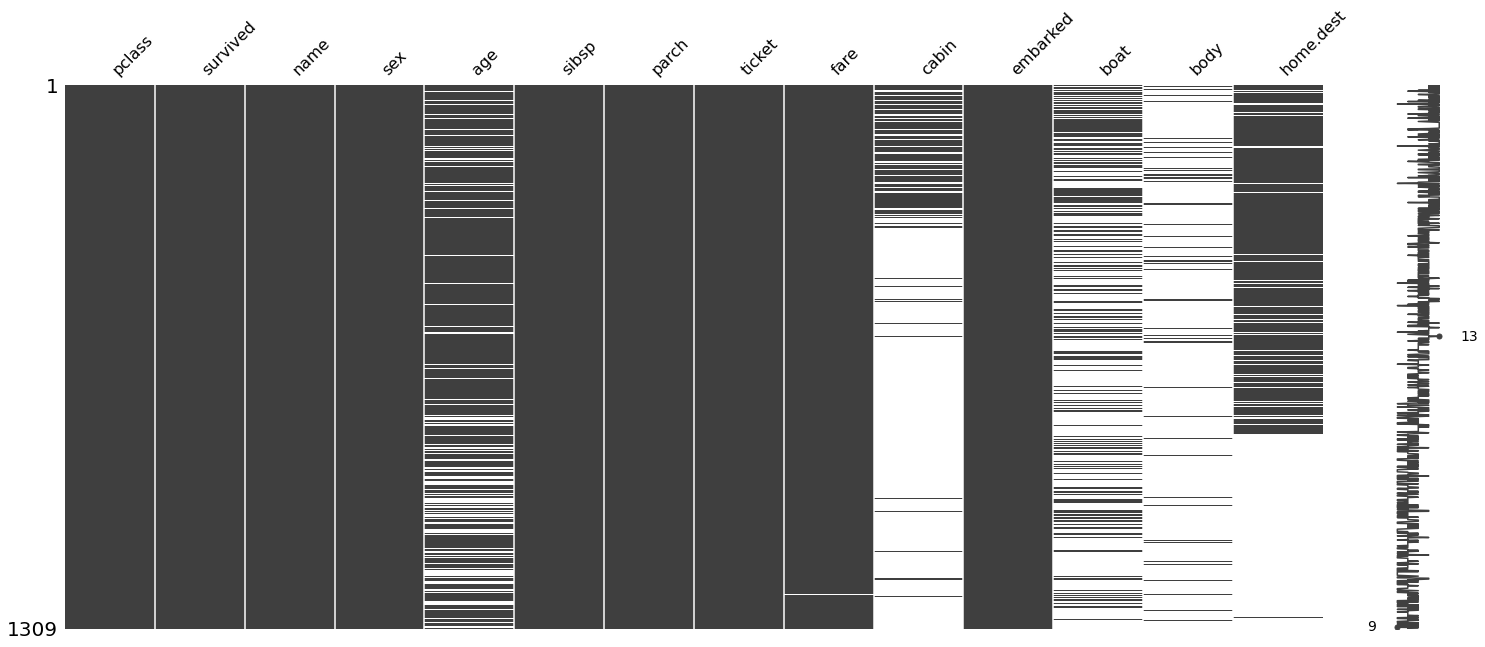

In [ ]:
plt.figure(figsize=(8,6))
msno.matrix(df)
plt.show()

###데이터 전처리
- body 컬럼의 경우 존재하는 데이터도 거의 없을 뿐더러 이미 survived의 값이 0인 데이터의 2차 데이터라 과감히 지웠다.
- boat의 경우 boat를 탔지만 생존하지 못했을 경우가 있을 수 있으므로 확인해본다.
- 문제는 age인데 결측치 개수가 꽤 있어서 일단 결측치 없는 값들의 분포를 보고 결측치를 평균으로 넣었을 때 그래프가 크게 변형이 되지 않는다면 평균값으로 대체한다.
- fare도 마찬가지로 평균값으로 치환하고 cabin이랑 home.dest는 일단 지켜본다.

In [ ]:
df.pop('body')

0         NaN
1         NaN
2         NaN
3       135.0
4         NaN
        ...  
1304    328.0
1305      NaN
1306    304.0
1307      NaN
1308      NaN
Name: body, Length: 1309, dtype: float64

In [ ]:
 # boat를 탔음에도 죽은사람들이 있으므로 컬럼자체는 지우지 않는다.
 df[ (~df['boat'].isna()) & (df['survived'] ==0)  ]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,13050,75.2417,C6,C,A,"Winnipeg, MN"
166,1,0,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C,14,"New York, NY"
544,2,0,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.0000,NaN,S,12,"Elizabeth, NJ"
655,3,0,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,D,"Ruotsinphytaa, Finland New York, NY"
853,3,0,"Harmer, Mr. Abraham (David Lishin)",male,25.0,0,0,374887,7.2500,NaN,S,B,NaN
921,3,0,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S,A,NaN
968,3,0,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S,A,NaN
969,3,0,"Lindell, Mrs. Edvard Bengtsson (Elin Gerda Per...",female,30.0,1,0,349910,15.5500,NaN,S,A,NaN
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN


In [ ]:
# 무지성 나이 결측치 채우기
df['age'].fillna(df['age'].mean(),inplace=True)

In [ ]:
#fare 결측치는 1개밖에 없어서 전체 평균해도 크게 영향이 없다.
df['fare'].fillna(df['fare'].mean(),inplace=True)

In [ ]:
df_base[df_base["age"].notnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.50,0,0,2628,7.2250,NaN,C,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN


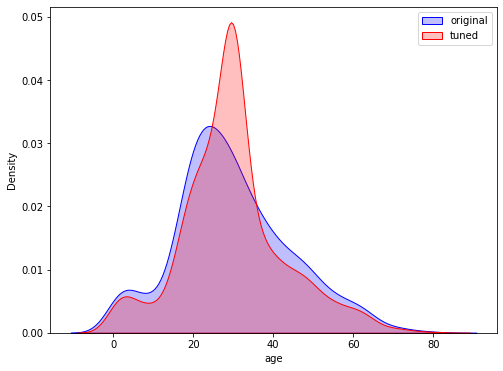

In [ ]:
# 무지성 나이 결측치 대체 그래프와 원래 그래프 비교
plt.figure(figsize=(8,6))

sns.kdeplot(x=df_base[df_base["age"].notnull()]['age'], color="Blue", shade = True, label="original" )
sns.kdeplot(x=df['age'],color="red", shade = True, label="tuned")

plt.legend()
plt.show()

* 그냥 전체 평균으로 age결측치에 평균을 넣었더니 그래프가 원래와 많이 모양이 달라진 것을 알 수 있다. 이럴 때에는 전체 평균보다 그룹을 세분화해서 그 그룹의 평균을 넣는 것이 좋다. 그래서 성별과 좌석 등급에 따라 평균을 구해서 결측치를 대체해보려고 한다.

In [ ]:
#성별과 등급에 따른 age 평균
print(f"age: {df[df['age'].notnull()].groupby(['sex'])['age'].mean()}")
print("==========================")
print(f"pclass: {df[df['age'].notnull()].groupby(['pclass'])['age'].mean()}")
print("==========================")
print(f"male pclass: {df[(df['age'].notnull()) & (df['sex']=='male')].groupby(['pclass'])['age'].mean()}")
print("==========================")
print(f"female pclass: {df[(df['age'].notnull()) & (df['sex']=='female')].groupby(['pclass'])['age'].mean()}")

age: sex
female    28.687088
male      30.585228
Name: age, dtype: float64
pclass: pclass
1    39.159930
2    29.506705
3    24.816367
Name: age, dtype: float64
male pclass: pclass
1    41.029272
2    30.815380
3    25.962264
Name: age, dtype: float64
female pclass: pclass
1    37.037594
2    27.499223
3    22.185329
Name: age, dtype: float64


In [ ]:
df['age'].fillna(df.groupby(["sex","pclass"])['age'].transform('mean'),inplace=True)


#df['Age'].fillna(df.groupby('Pclass')['Age'].transform('mean'), inplace=True)
#df['age'].fillna(df['age'].mean(),inplace=True)

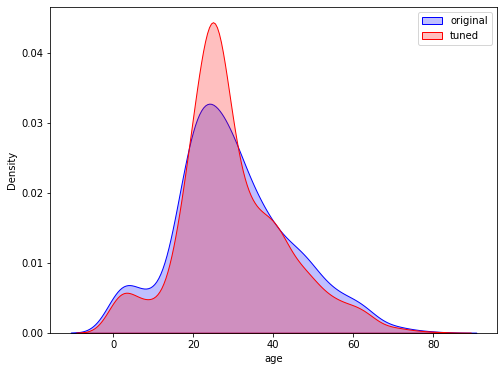

In [ ]:
plt.figure(figsize=(8,6))

sns.kdeplot(x=df_base[df_base["age"].notnull()]['age'], color="Blue", shade = True, label="original" )
sns.kdeplot(x=df['age'],color="red", shade = True, label="tuned")

plt.legend()
plt.show()

* 전체를 평균으로 낸것보다 세분화 해서 평균값을 각 결측치에 분할 했을때 보다 더 원래 그래프에 가까워진 것을 알 수 있다.

<Figure size 576x432 with 0 Axes>

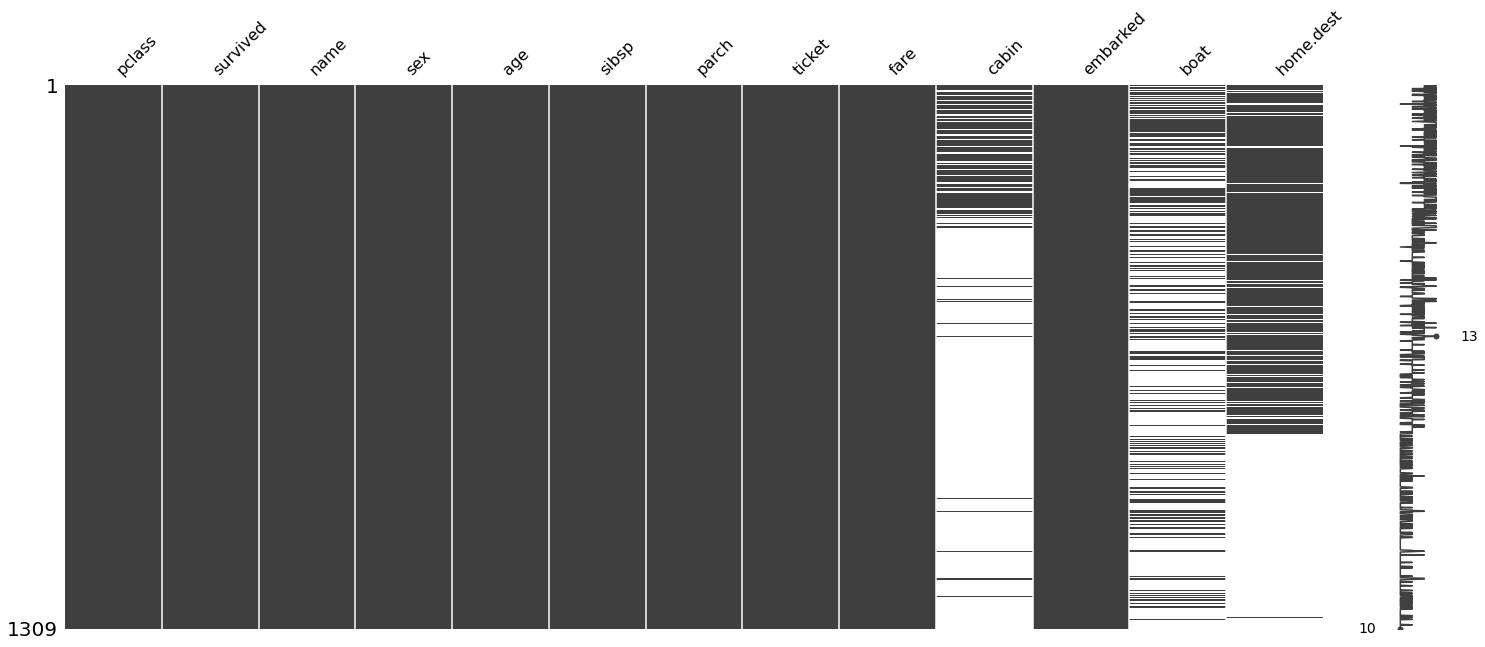

In [ ]:
plt.figure(figsize=(8,6))
msno.matrix(df)
plt.show()

##분석

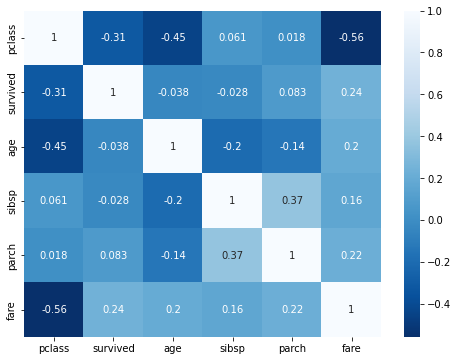

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues_r")
plt.show()

###변수 분석

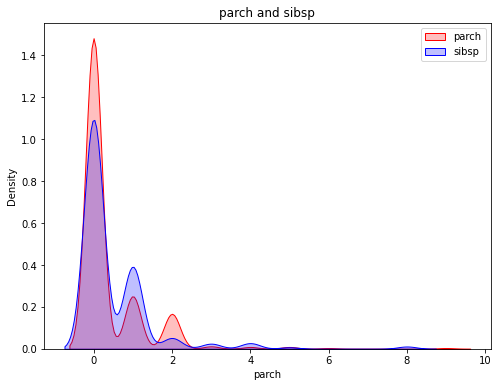

In [ ]:
# 형제수와 부모수 분포 
plt.figure(figsize=(8,6))
plt.title("parch and sibsp")
sns.kdeplot(x=df['parch'],color="red", shade = True, label="parch")
sns.kdeplot(x=df['sibsp'],color="blue", shade = True, label="sibsp")

plt.legend()
plt.show()

### 단일 변수

####연령과 생존률

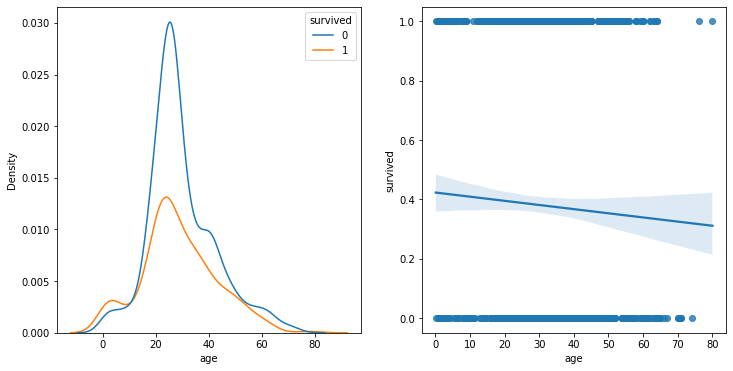

In [ ]:
fig= plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
graph2 = fig.add_subplot(1,2,2)


sns.kdeplot(data=df, x="age", hue='survived',ax=graph1)        # 연령대별 분포와 생존분포
sns.regplot(x = 'age', y = 'survived', data = df,ax=graph2)     # 연령과 생존과의 상관관계 분석

plt.show()

In [ ]:
# 연령대 나누기 (prod. by 에버랜드)
def age_make(x):
    if x<=3.0:
        return "baby"
    elif x<=13.:
        return "kid"
    elif x<=18.:
        return "teenage"
    elif x<=60.:
        return "adult"
    else:
        return "old"

df['cat.age']=df['age'].apply(age_make)

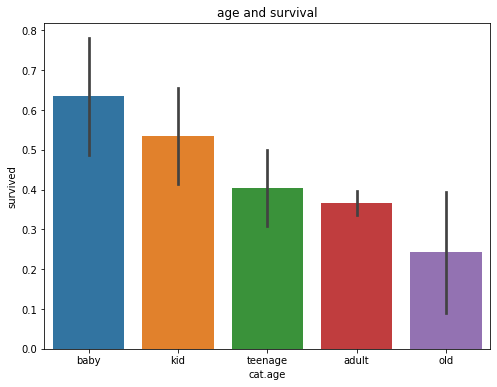

In [ ]:
# 연령대 별 생존률 그래프
plt.figure(figsize=(8,6))
plt.title("age and survival")

sns.barplot(x='cat.age',y='survived',data=df , order=['baby','kid','teenage','adult','old'])

plt.show()

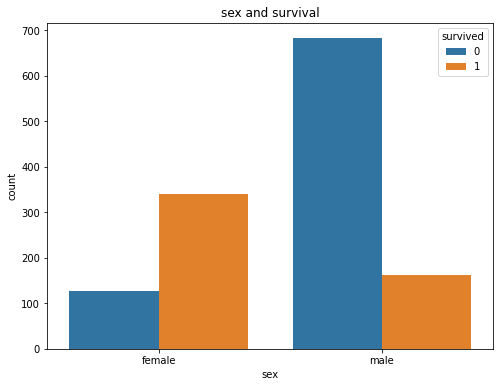

In [ ]:
plt.figure(figsize=(8,6))
plt.title("sex and survival")

sns.countplot(data=df , x="sex", hue="survived")

plt.show()

####성별과 생존률

####등급과 생존률

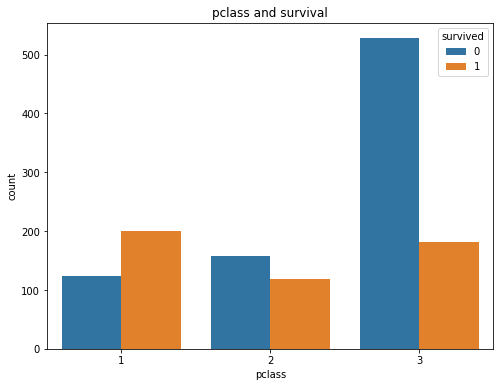

In [ ]:
plt.figure(figsize=(8,6))
plt.title("pclass and survival")
sns.countplot(data=df , x="pclass", hue="survived")

plt.show()

####Parch와 생존률

In [ ]:
# parch 나누기 (prod. by 에버랜드)
def parch_make(x):
    if x==0:
        return "0"
    elif x==1:
        return "1"
    elif x>=2.:
        return "2 and more"

df['cat.parch']=df['parch'].apply(parch_make)

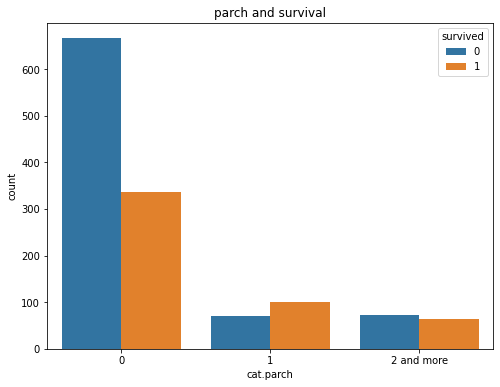

In [ ]:
plt.figure(figsize=(8,6))
plt.title("parch and survival")
sns.countplot(data=df , x="cat.parch", hue="survived" , order=["0","1","2 and more"])

plt.show()

####sibsp와 생존률


In [ ]:
# parch 나누기 (prod. by 에버랜드)
def sibsp_make(x):
    if x==0:
        return "0"
    elif x==1:
        return "1"
    elif x>=2:
        return "2 and more"

df['cat.sibsp']=df['sibsp'].apply(sibsp_make)

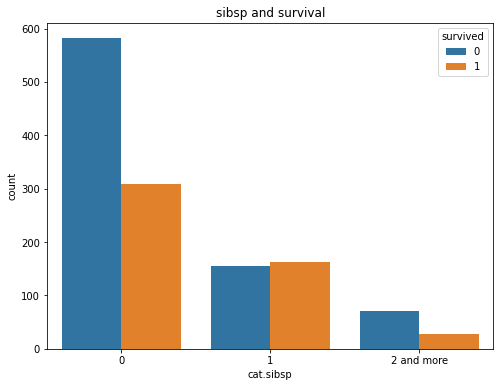

In [ ]:
plt.figure(figsize=(8,6))
plt.title("sibsp and survival")
sns.countplot(data=df , x="cat.sibsp", hue="survived" , order=["0","1","2 and more"])

plt.show()

####소결론
* 연령에서는 연령대가 많아짐에 따라 생존율이 감소하는 경향을 보이고 있다.
* 성별에서는 남자와 여자의 차이가 확연히 드러나며 여자가 생존율이 더 높은 것을 알 수있다.
* 등급에서는 등급을 봤을 때는 등급이 높을수록 생존률도 올라감을 알 수 있다.
* parch 와 sibsp는 생존률과 큰 차이는 보이지 않지만 특징은 둘다 1일때 생존률이 가장 높았다.

###다중 변수

####성별과 등급에 따른 생존률

<Figure size 432x288 with 0 Axes>

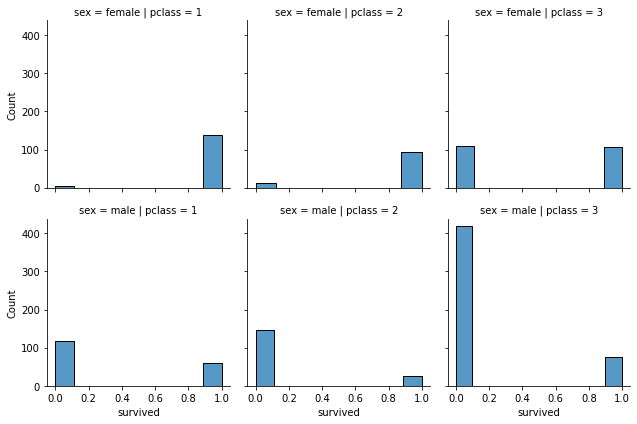

In [ ]:
plt.figure()

sns.FacetGrid(df, col = 'pclass', row = 'sex').map(sns.histplot, 'survived')

plt.show()

####성별과 연령에 따른 생존률

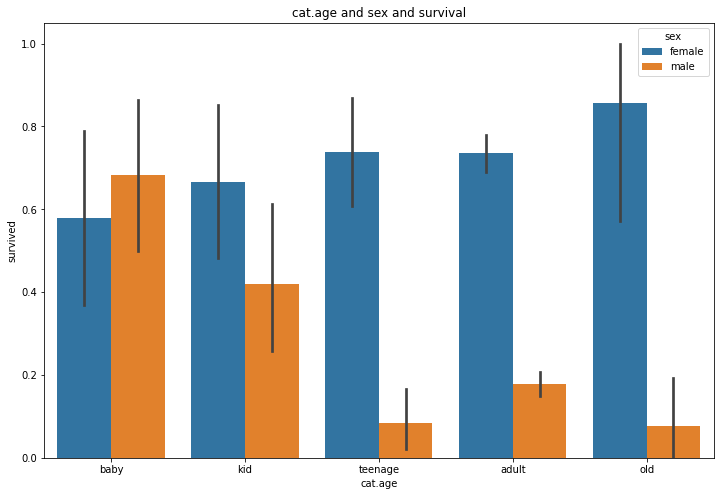

In [ ]:
plt.figure(figsize=(12,8))
plt.title("cat.age and sex and survival")

sns.barplot(data=df,x="cat.age",y="survived", hue="sex",order=['baby','kid','teenage','adult','old'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 432x288 with 0 Axes>

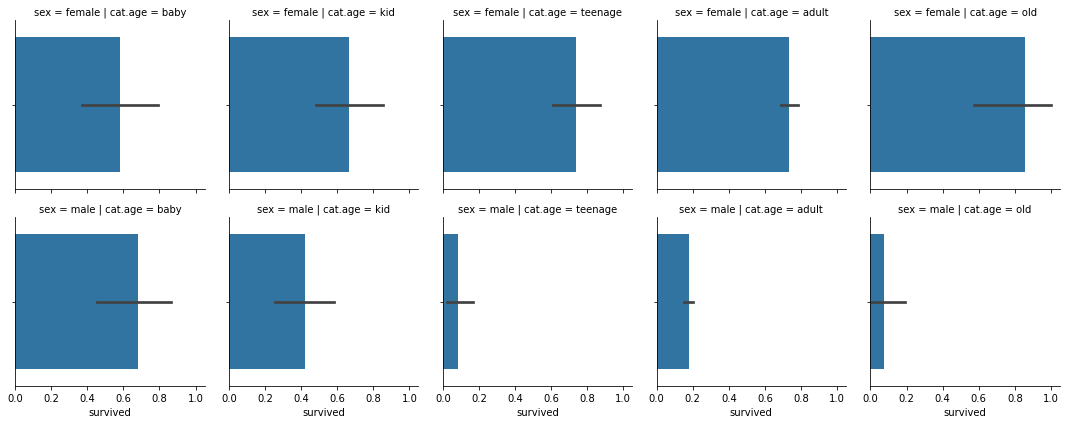

In [ ]:
plt.figure()

sns.FacetGrid(df, col = 'cat.age', row = 'sex',col_order=['baby','kid','teenage','adult','old']).map(sns.barplot, 'survived')

plt.show()

####등급과 연령에 따른 생존률

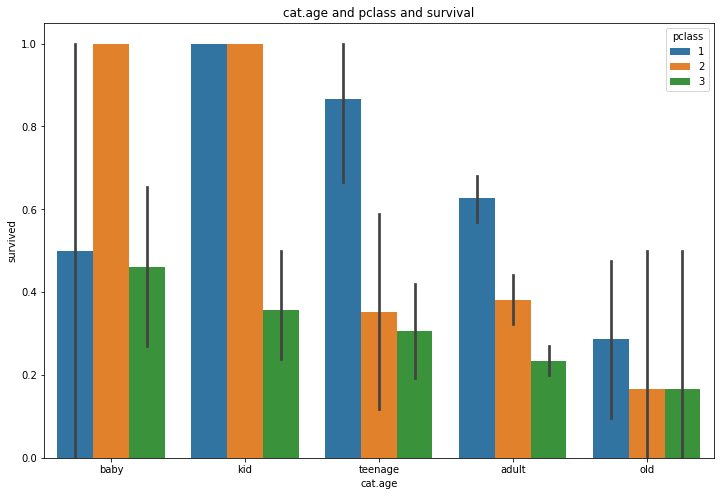

In [ ]:
plt.figure(figsize=(12,8))
plt.title("cat.age and pclass and survival")

sns.barplot(data=df,x="cat.age",y="survived", hue="pclass",order=['baby','kid','teenage','adult','old'])

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 432x288 with 0 Axes>

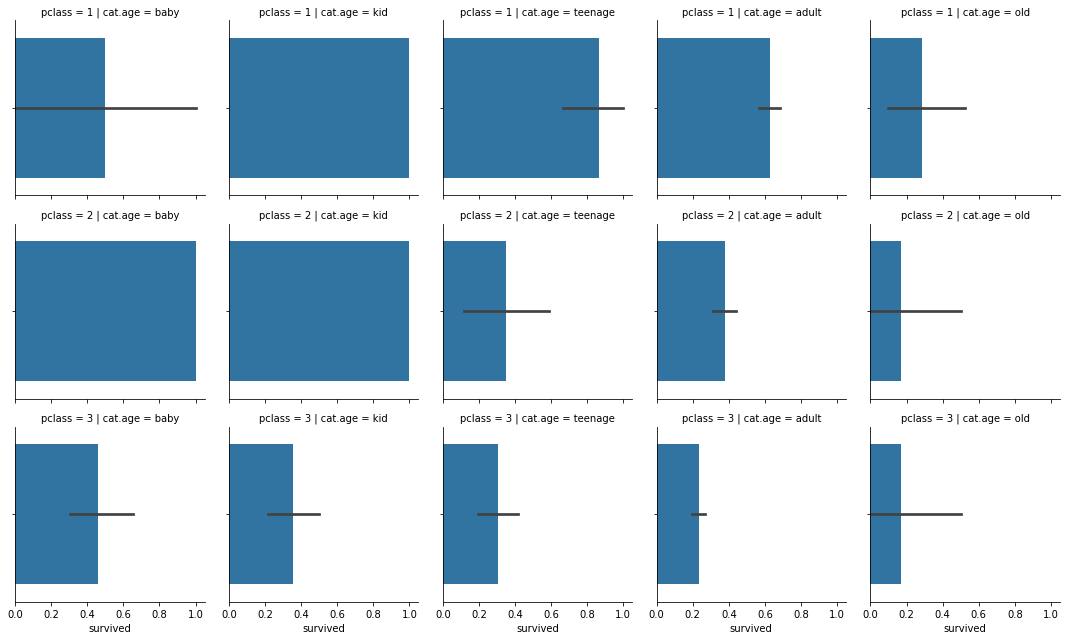

In [ ]:
plt.figure()

sns.FacetGrid(df, col = 'cat.age', row = 'pclass',col_order=['baby','kid','teenage','adult','old']).map(sns.barplot, 'survived')

plt.show()

####성별,등급,연령에 따른 생존률

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 432x288 with 0 Axes>

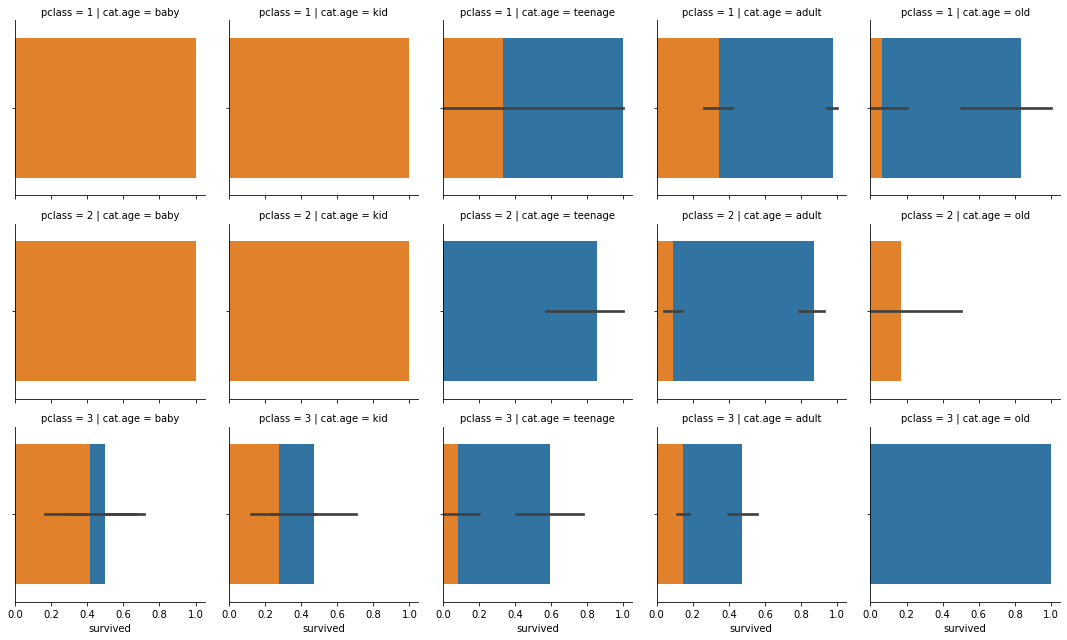

In [ ]:
plt.figure()

sns.FacetGrid(df, col = 'cat.age', row = 'pclass',col_order=['baby','kid','teenage','adult','old'],hue='sex').map(sns.barplot, 'survived')

plt.show()

####소결론
* 성별을 떠나서 등급이 높을수록 생존률이 올라가지만 남자는 낮은 등급일 때 생존률이 급격하게 떨어지는 경향을 알 수 있다.
* 연령대에선 60세 이상의 표본이 많지 않으므로 결정적인 지표는 되지 못한다. 따라서 adult연령까지 확인했을 때 특이한 점은 여자는 연령대가 높아질수록 생존률 이 증가하지만 남자는 또 급격하게 감소한다.
* 등급과 연령대의 관계에서는 등급이 높고 연령대가 낮을수록 생존률이 올라갔다. 하지만 연령대 양 끝의 데이터가 역시 충분치 않아서 그 연령대의 데이터는 확실치 않다.

##결론

* 단일 변수 중에 생존률과 유의미한 관계가 있는 것은 연령과 성별, 그리고 좌석 등급이었다.

* 이 유의미한 지표들을 다중 변수로 확인한 결과는 각각이 가진 생존률과의 관계에서 달라지는 것을 알 수 있었다.(연령은 대체적으로 높을수록 생존률이 떨어지는데 여자 중에서의 연령대는 그 반대의 경향을 보였다.)